Chapter 6 - Linear Model Selection Regularization - Question 9

## (a)

In [189]:
set.seed(1)
#creating coefficient vector
#beta=sample(1:20,20,replace=TRUE)
beta=rnorm(20)
beta[sample(1:20,5)]=0
#creating X variables matrix
n=1000
p=20
X = matrix(rnorm(n*p),n,p)
#error
err = rnorm(n)
#model
Y = X%*%beta + err
#dataset
dataset=data.frame(Y,X)

## (b)

In [190]:
set.seed(1)
train = sample(nrow(dataset),100,replace=FALSE)

## (c)

In [191]:
library(leaps)
set.seed(1)
bestsubset.model = regsubsets(Y~.,data=dataset,nvmax=20,subset=train)
bestsubset.summary = summary(bestsubset.model)

In [192]:
bestsubset.summary

Subset selection object
Call: regsubsets.formula(Y ~ ., data = dataset, nvmax = 20, subset = train)
20 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " " " " " " " " " " " " " " " " " " " " " " " " " "*" " " " " " "
2  ( 1 )  " " " " " " "*" " " " " " " " " " " " " " " " " " " "*" " " " " " "
3  ( 1 )  " " " " " " "*" " " " " " " " " " " "

In [193]:
mse=rep(NA,20)
for(i in 1:20){
    coef_vec = coef(bestsubset.model,id=i)
    pred=as.matrix(dataset[train,names(coef_vec)[-1]])%*%coef_vec[-1]
    mse[i]=mean((pred-dataset$Y[train])^2)
}

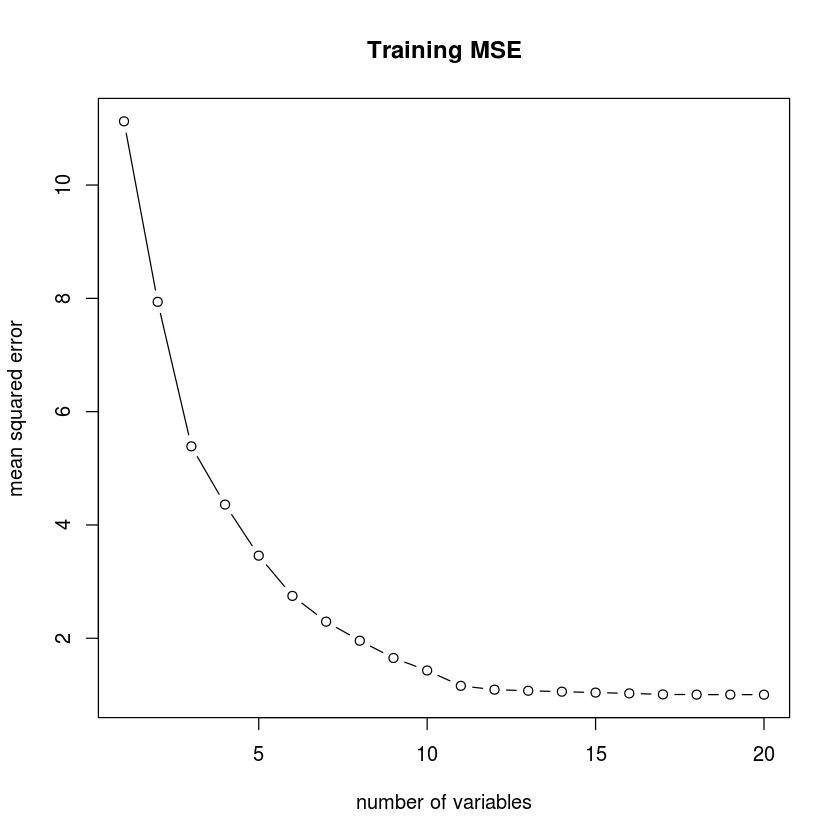

In [194]:
plot(mse,ylab="mean squared error",xlab="number of variables",type="b",main="Training MSE")

## (d)

In [195]:
mse=rep(NA,20)
for(i in 1:20){
    coef_vec = coef(bestsubset.model,id=i)
    pred=as.matrix(dataset[-train,names(coef_vec)[-1]])%*%coef_vec[-1]
    mse[i]=mean((pred-dataset$Y[-train])^2)
}

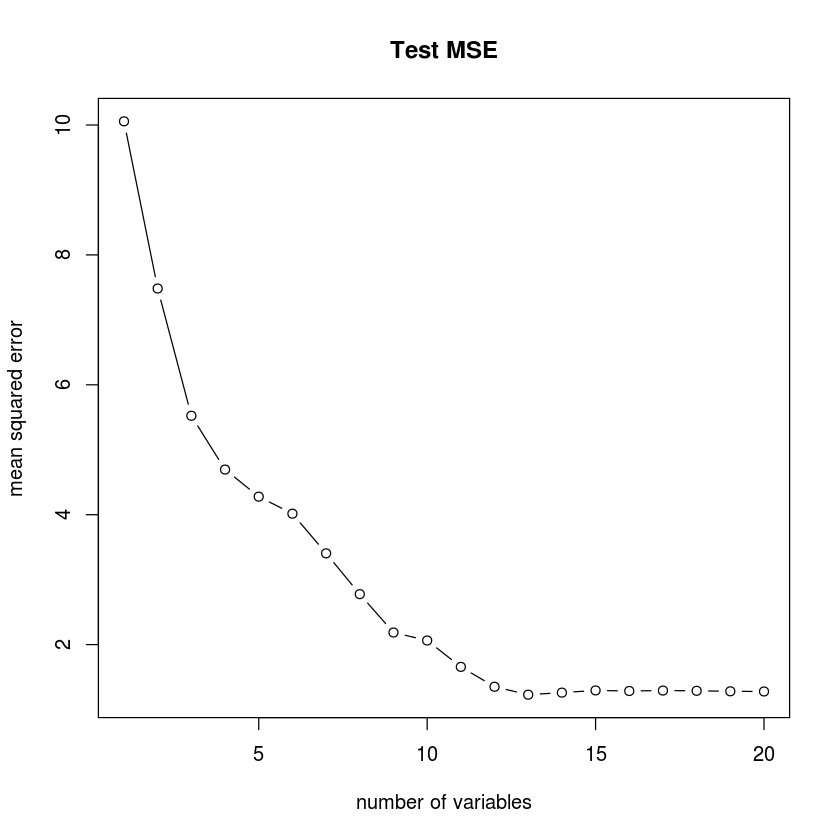

In [196]:
plot(mse,ylab="mean squared error",xlab="number of variables",type="b",main="Test MSE")

## (e)

In [197]:
#The size of the model giving the least MSE on test data
which.min(mse)

[1] 13

## (f)

In [202]:
which(beta==0)
coef(bestsubset.model,id=13)

[1]  9 10 13 15 17

(Intercept)          X1          X3          X4          X5          X6 
 -0.2004369  -0.6318967  -0.6593369   1.6502051   0.1776905  -0.8482335 
         X7          X8         X11         X12         X14         X18 
  0.3518520   0.7382114   1.4232920   0.4620461  -2.4381835   0.8263389 
        X19         X20 
  0.7806143   0.4903300

The model with 13 variables has caught all the zeros in the actual model and has excluded them.

## (g)

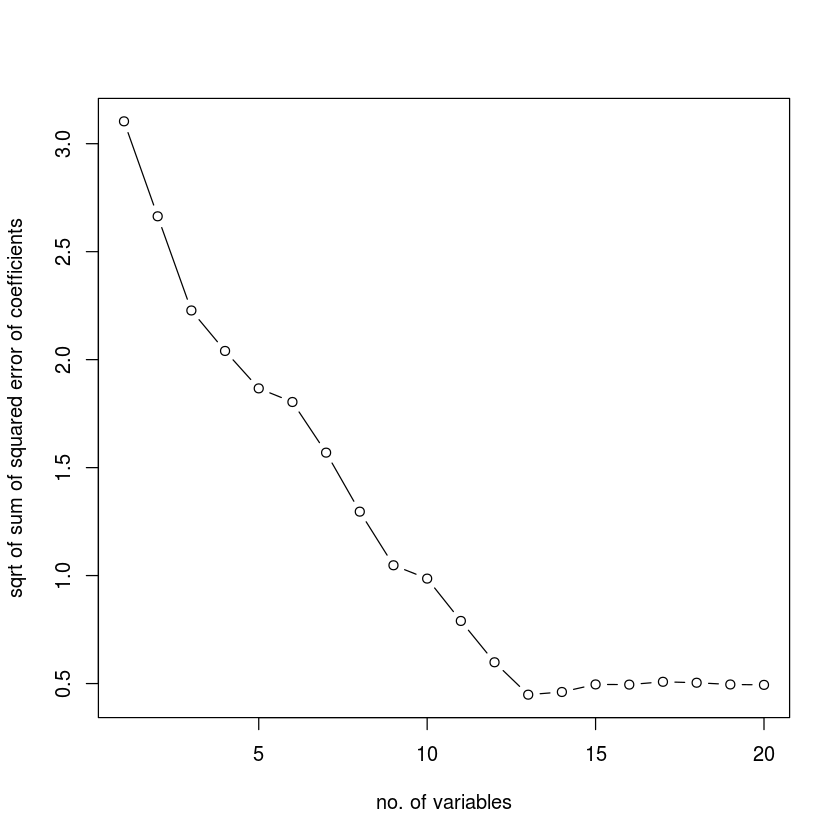

In [245]:
b=beta
b.hat = beta
b.hat = data.frame(b)
rownames(b.hat)=names(coef(bestsubset.model,id=20))[-1]
val = rep(NA,20)
for(i in 1:20){
    coef_vec = coef(bestsubset.model,id=i)
    match  = rownames(b.hat) %in% names(coef_vec)
    b.hat[match,]=coef_vec[-1]
    b.hat[!match,]=0
    val[i]=sqrt(sum((b-b.hat)^2))
}
plot(val,ylab="sqrt of sum of squared error of coefficients",xlab="no. of variables",type="b")

In [238]:
which.min(val)

[1] 13

The graph seems similar to graph of test MSE in (d)